# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
!pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key


'9aca9ebf1aedb239f097f48e362e50ca'

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


In [5]:
cities

['yellowknife',
 'adamstown',
 'port elizabeth',
 'waitangi',
 'saint-mandrier-sur-mer',
 'hawaiian paradise park',
 'aasiaat',
 'hadibu',
 'stanley',
 "untsukul'",
 'saida',
 'kulia village',
 'invercargill',
 'west island',
 'edinburgh of the seven seas',
 'sparta',
 'sitka',
 'gokarna',
 'praia da vitoria',
 'sinabang',
 'blackmans bay',
 'iqaluit',
 'bethel',
 'aleksandrov gay',
 'okhotsk',
 'port mathurin',
 'ushuaia',
 'hermanus',
 'taro',
 'port-aux-francais',
 'grytviken',
 'uturoa',
 'santiago de cao',
 'papatowai',
 'isafjordur',
 "kapa'a",
 'wailua homesteads',
 'saint-philippe',
 'kavaratti',
 'vorgashor',
 'tandalti',
 'broome',
 'vorkuta',
 'as sulayyil',
 'taiohae',
 'cargados carajos',
 'auki',
 'albany',
 'quatre cocos',
 'razole',
 'kayangel',
 'constantia',
 'leava',
 'tura',
 'ludwin',
 'ribeira grande',
 'kutum',
 'puerto natales',
 'vilyuchinsk',
 'bardai',
 'bousse',
 'new norfolk',
 'hithadhoo',
 'karachi',
 'yuzhno-kurilsk',
 'berdigestyakh',
 'saudarkrokur',
 

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=san francisco")

https://api.openweathermap.org/data/2.5/weather?units=metric&appid=9aca9ebf1aedb239f097f48e362e50ca&q=san francisco


In [8]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | saint-mandrier-sur-mer
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | aasiaat
Processing Record 8 of Set 1 | hadibu
Processing Record 9 of Set 1 | stanley
Processing Record 10 of Set 1 | untsukul'
Processing Record 11 of Set 1 | saida
Processing Record 12 of Set 1 | kulia village
City not found. Skipping...
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | sparta
Processing Record 17 of Set 1 | sitka
Processing Record 18 of Set 1 | gokarna
Processing Record 19 of Set 1 | praia da vitoria
Processing Record 20 of Set 1 | sinabang
Processing Record 21 of Set 1 | blac

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,11.34,99,100,1.79,CA,1725390715
1,adamstown,-25.0660,-130.1015,17.28,54,53,7.64,PN,1725390716
2,port elizabeth,-33.9180,25.5701,16.84,82,0,2.57,ZA,1725390717
3,waitangi,-43.9535,-176.5597,12.12,98,100,1.34,NZ,1725390718
4,saint-mandrier-sur-mer,43.0780,5.9290,26.96,76,0,1.54,FR,1725390719


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,11.34,99,100,1.79,CA,1725390715
1,adamstown,-25.0660,-130.1015,17.28,54,53,7.64,PN,1725390716
2,port elizabeth,-33.9180,25.5701,16.84,82,0,2.57,ZA,1725390717
3,waitangi,-43.9535,-176.5597,12.12,98,100,1.34,NZ,1725390718
4,saint-mandrier-sur-mer,43.0780,5.9290,26.96,76,0,1.54,FR,1725390719


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

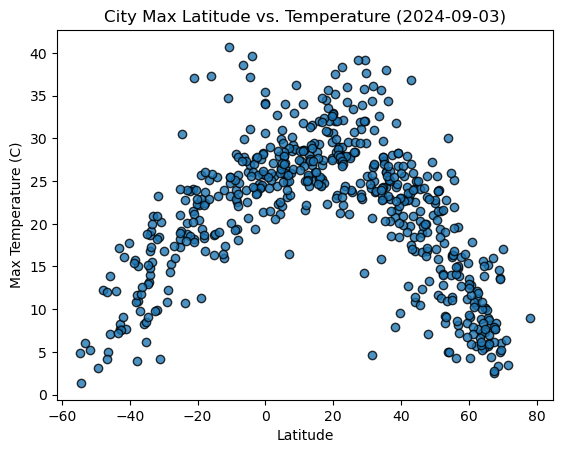

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

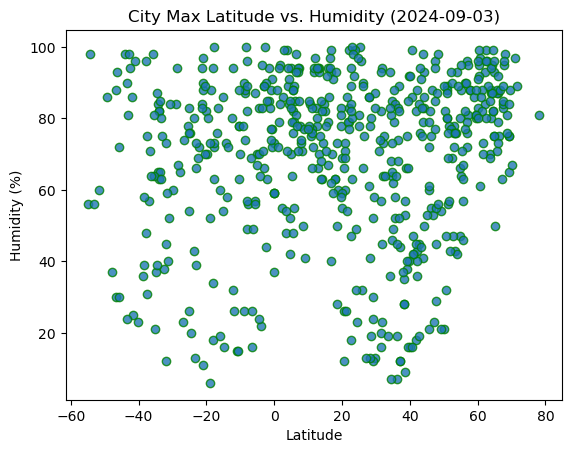

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="green",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

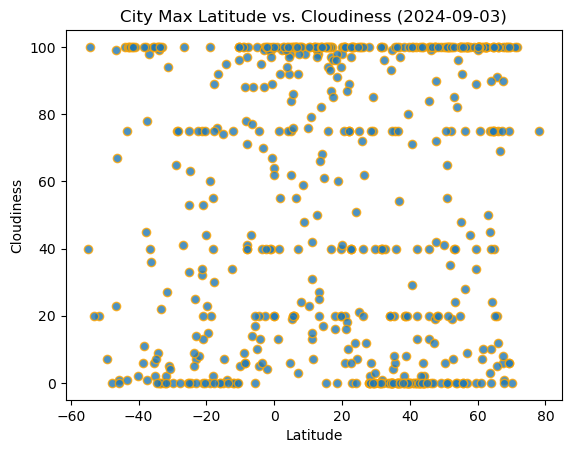

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)


# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

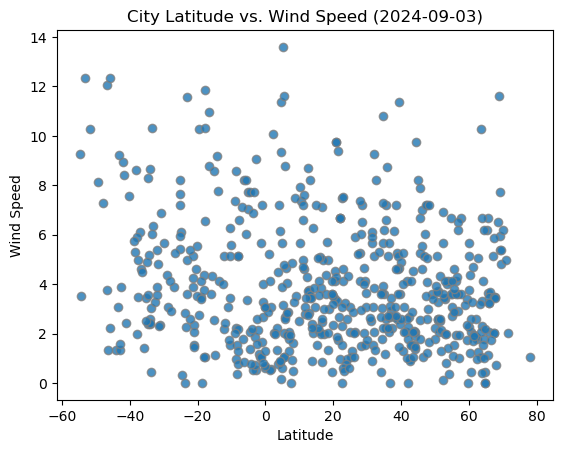

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="grey",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):

    #Compute linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize = 15, color = "green")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()



In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,11.34,99,100,1.79,CA,1725390715
4,saint-mandrier-sur-mer,43.0780,5.9290,26.96,76,0,1.54,FR,1725390719
5,hawaiian paradise park,19.5933,-154.9731,27.72,78,40,0.45,US,1725390720
6,aasiaat,68.7098,-52.8699,3.29,81,100,6.52,GL,1725390721
7,hadibu,12.6500,54.0333,25.47,78,50,8.70,YE,1725390722


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,17.28,54,53,7.64,PN,1725390716
2,port elizabeth,-33.9180,25.5701,16.84,82,0,2.57,ZA,1725390717
3,waitangi,-43.9535,-176.5597,12.12,98,100,1.34,NZ,1725390718
11,invercargill,-46.4000,168.3500,5.01,93,67,1.34,NZ,1725390728
12,west island,-12.1568,96.8225,23.99,94,75,5.14,CC,1725390729


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.568201179111042


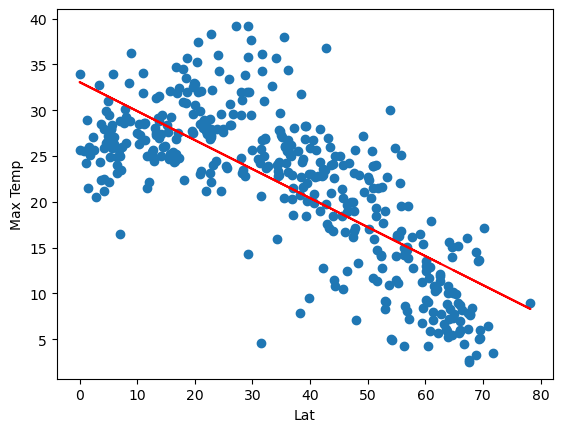

In [26]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, -10))

The r-value is 0.6285202615765616


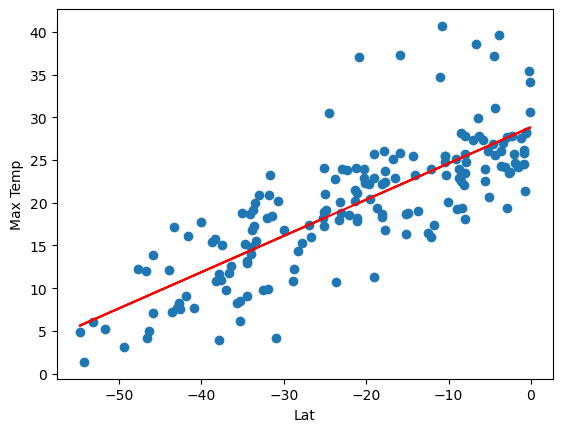

In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, -10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.0025967385805838097


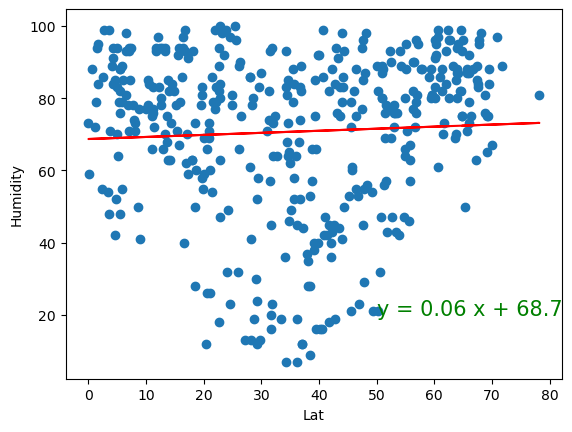

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50, 20))

The r-value is 0.004017907485132753


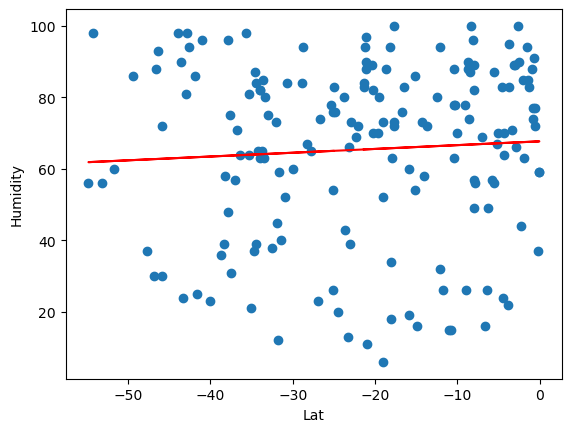

In [71]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.005408710163047969


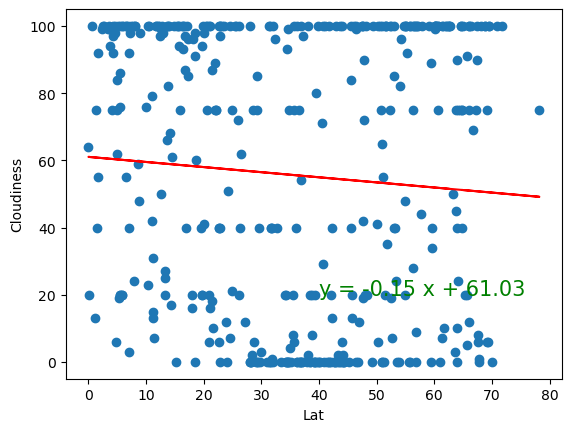

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40, 20))


The r-value is 0.007492064037757917


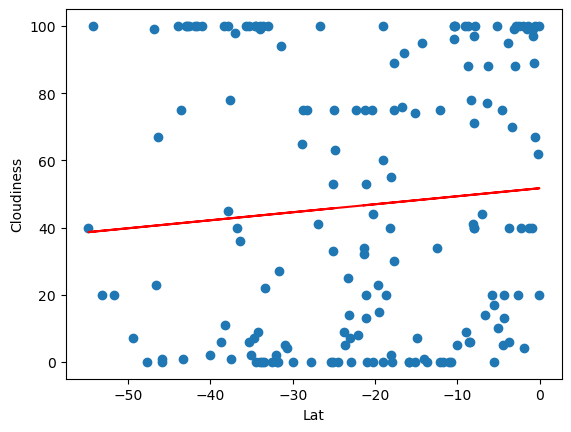

In [77]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.004688396714198248


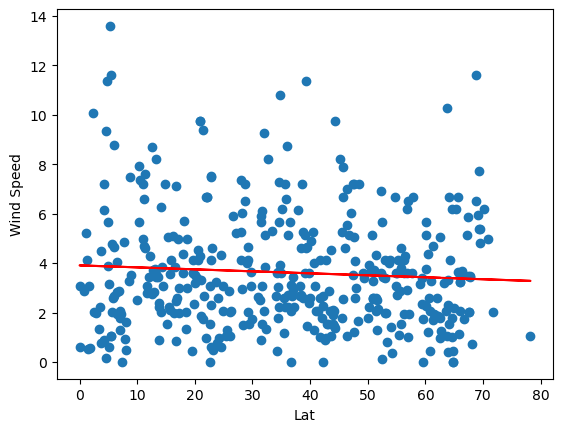

In [79]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10, 15))

The r-value is 0.06834597805583971


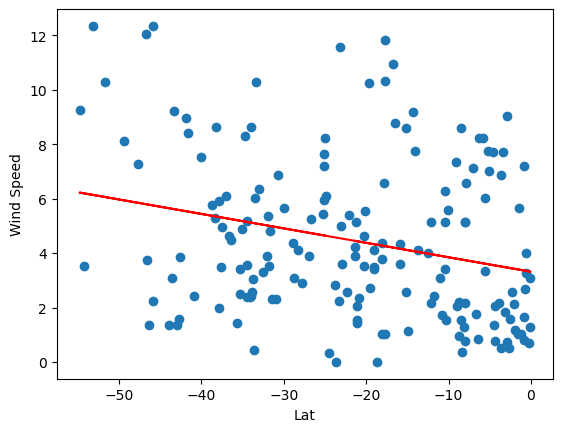

In [81]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10, 15))

**Discussion about the linear relationship:** YOUR RESPONSE HERE